# Import Data

In [2]:
from google.colab import files
uploaded = files.upload()

Saving human_resources.csv to human_resources.csv


In [3]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['human_resources.csv']))

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Statistika Deskriptif

## Mean

In [6]:
df_monthly_hours = df['average_montly_hours']
df_monthly_hours.mean()

201.0503366891126

## Median

In [7]:
df_monthly_hours = df['average_montly_hours']
df_monthly_hours.median()

200.0

## Mode

In [8]:
df_monthly_hours = df['average_montly_hours']
df_monthly_hours.mode()

0    135
1    156
Name: average_montly_hours, dtype: int64

In [9]:
df_monthly_hours.value_counts()

average_montly_hours
135    153
156    153
149    148
151    147
160    136
      ... 
297      7
288      6
299      6
96       6
303      6
Name: count, Length: 215, dtype: int64

## Range

In [10]:
df_monthly_hours = df['average_montly_hours']
df_monthly_hours.max() - df_monthly_hours.min()

214

## Variance and Standard Deviation

In [11]:
df_monthly_hours = df['average_montly_hours']

In [12]:
# Variance
df_monthly_hours.var()

2494.313174809956

In [13]:
# Standard Deviation
df_monthly_hours.std()

49.94309937128408

## IQR

In [14]:
df_monthly_hours.quantile(0.75) - df_monthly_hours.quantile(0.25)

89.0

## Outliers

In [15]:
def get_outliers(df):

    # Menghitung 25th dan 75th percentile
    p75 = df.quantile(0.75)
    p25 = df.quantile(0.25)
    # Menghitung IQR dengan selisih 25th dan 75th percentile
    iqr = p75 - p25

    # "Minimum non-outlier value": 25th percentile - 1.5 * IQR
    min_val = p25 - 1.5*iqr
    # "Maximum non-outlier value": 75th percentile + 1.5 * IQR
    max_val = p75 + 1.5*iqr

    # Apapun dibawah minimum atau diatas maximum, disebut sebagai outlier
    outliers = df[(df < min_val) | (df > max_val)]
    return outliers

In [16]:
get_outliers(df_monthly_hours)

Series([], Name: average_montly_hours, dtype: int64)

# Distribusi Data

In [17]:
import matplotlib
import matplotlib.pyplot as plt

(array([3244., 6443., 2557., 1473.,    0.,  718.,  188.,  162.,    0.,
         214.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

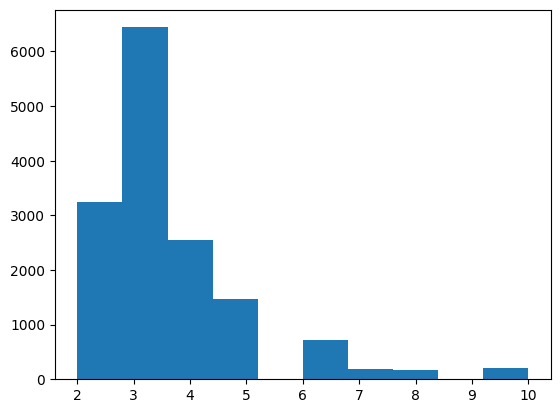

In [18]:
plt.hist(df['time_spend_company'])

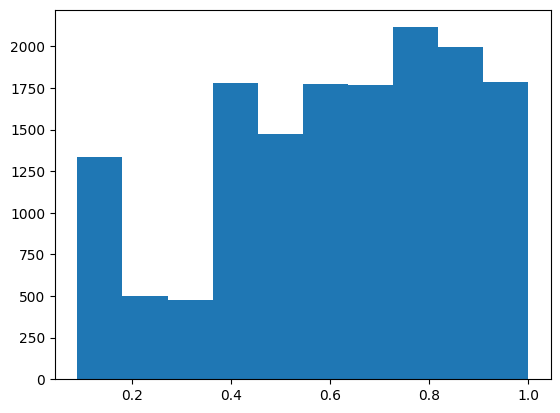

In [19]:
plt.hist(df['satisfaction_level'])
plt.show()

# Korelasi

In [20]:
import seaborn as sns

In [21]:
from sklearn import datasets
iris = datasets.load_iris()
iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [22]:
iris.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


## Heatmap

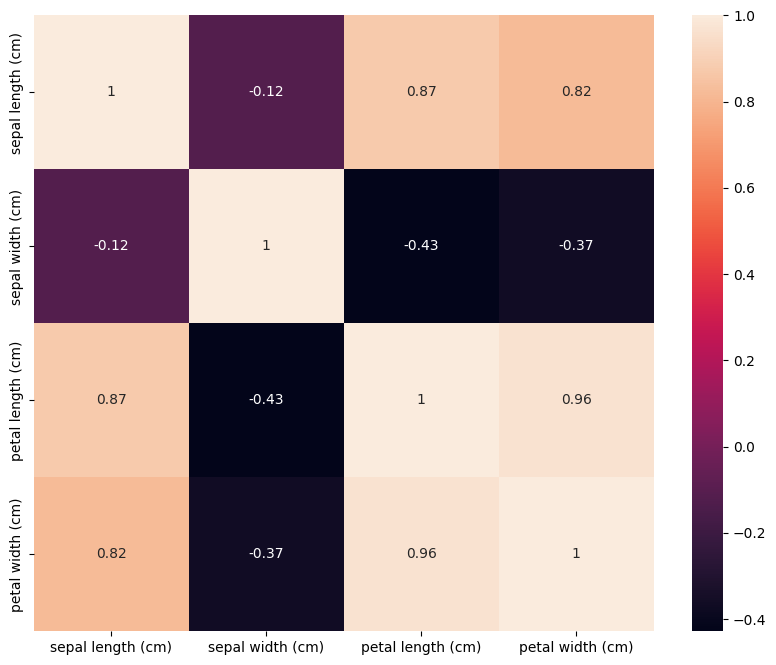

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(iris.corr(),annot=True)
plt.show()

## Regplot

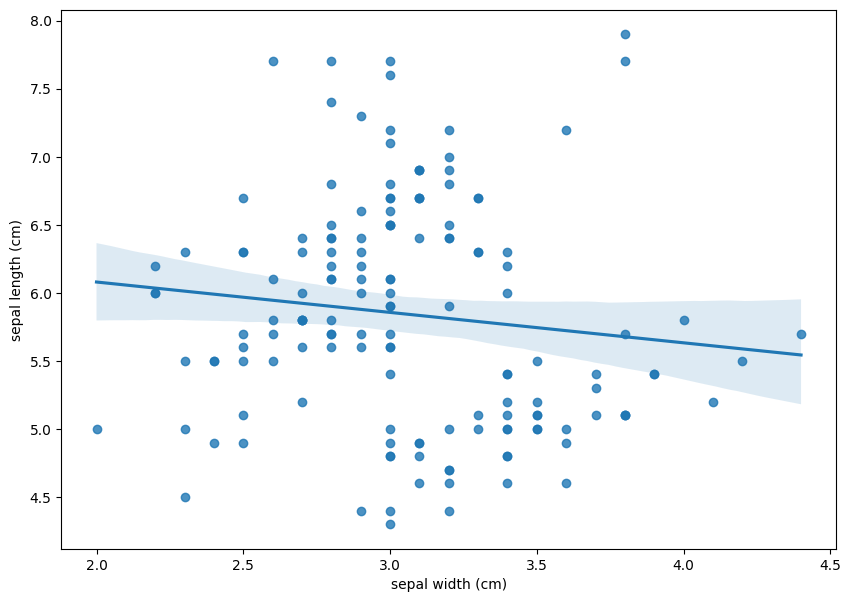

In [24]:
plt.figure(figsize = (10,7))
sns.regplot(x='sepal width (cm)',y='sepal length (cm)', data = iris)
plt.show()

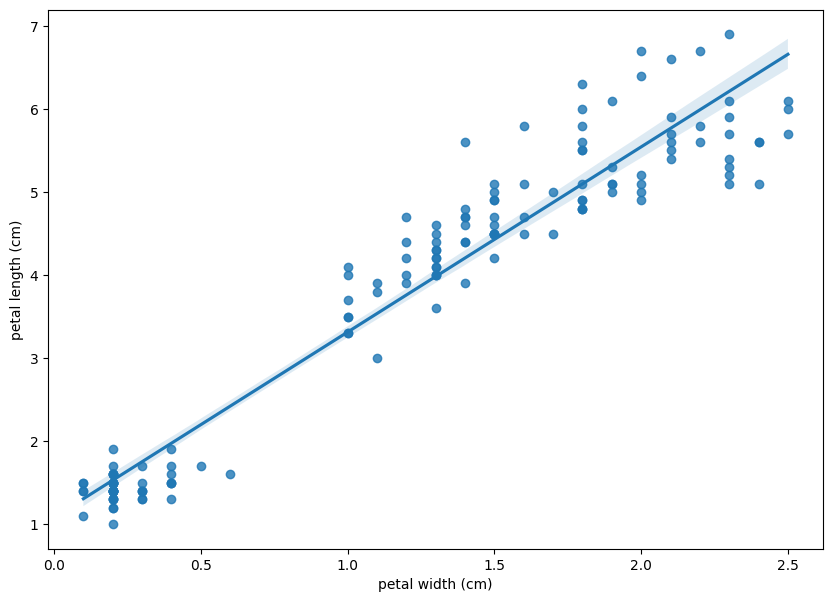

In [25]:
plt.figure(figsize = (10,7))
sns.regplot(x='petal width (cm)',y='petal length (cm)',data = iris)
plt.show()

## Heatmap for HR Analytics

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

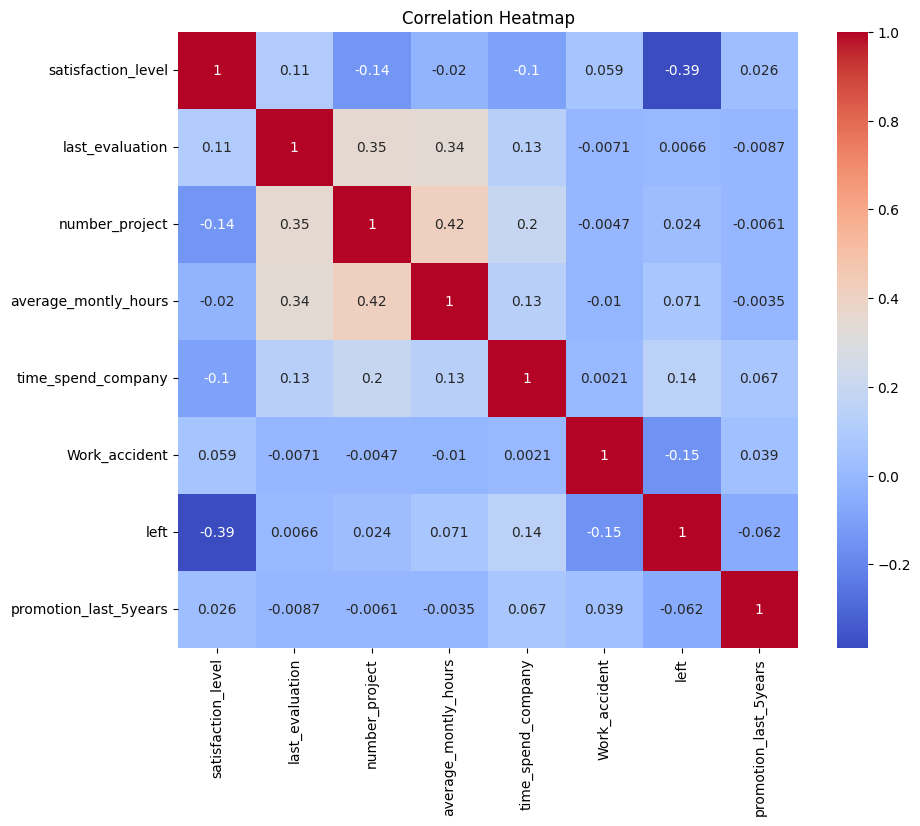

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Menghapus kolom non-numerik
numeric_data = df.drop(columns=['sales', 'salary'])

# Menghitung korelasi
correlation_matrix = numeric_data.corr()

# Visualisasi heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


#Buatlah Analisi Eksperimen untuk Hubungan Sebab Akibat dari dua variable yang kalian pilih

In [ ]:
#TUGAS
#Buatlah Analisis Statistik Deskriptif dari data ini
#Analisis Eksperimen untuk Hubungan Sebab Akibat dari dua variable yang kalian pilih

In [28]:
import pandas as pd


# Statistik deskriptif untuk variabel satisfaction_level dan time_spend_company
descriptive_stats = df[['satisfaction_level', 'time_spend_company']].describe()
print(descriptive_stats)


       satisfaction_level  time_spend_company
count        14999.000000        14999.000000
mean             0.612834            3.498233
std              0.248631            1.460136
min              0.090000            2.000000
25%              0.440000            3.000000
50%              0.640000            3.000000
75%              0.820000            4.000000
max              1.000000           10.000000


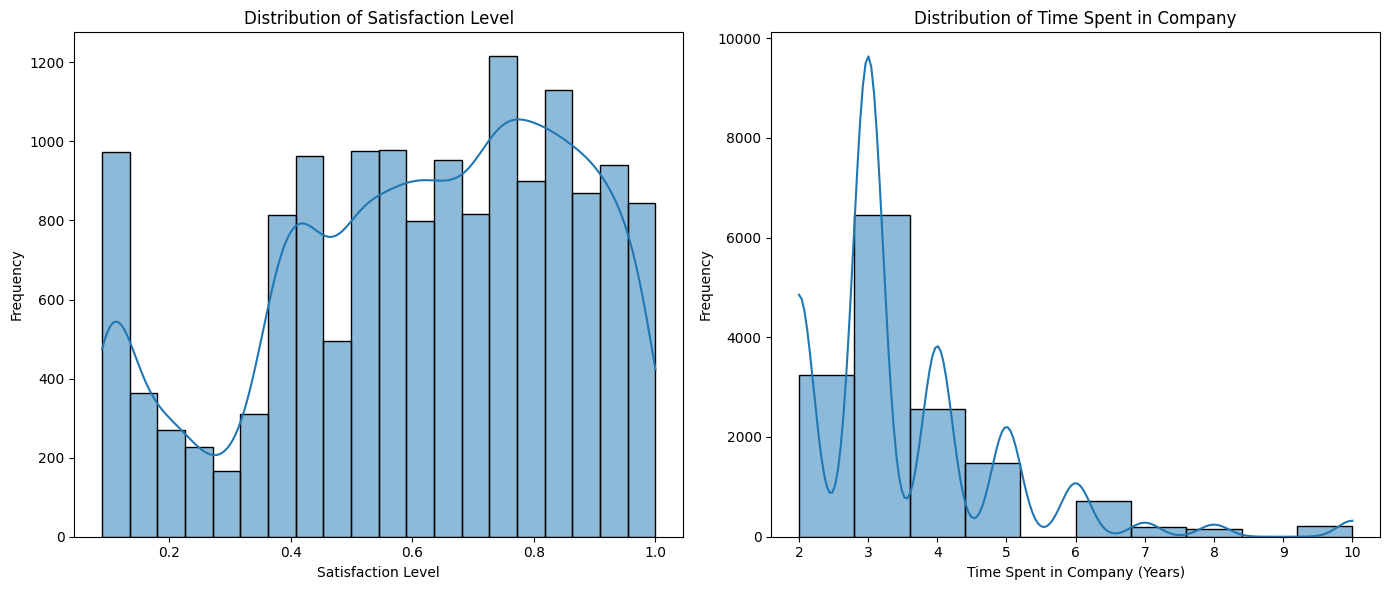

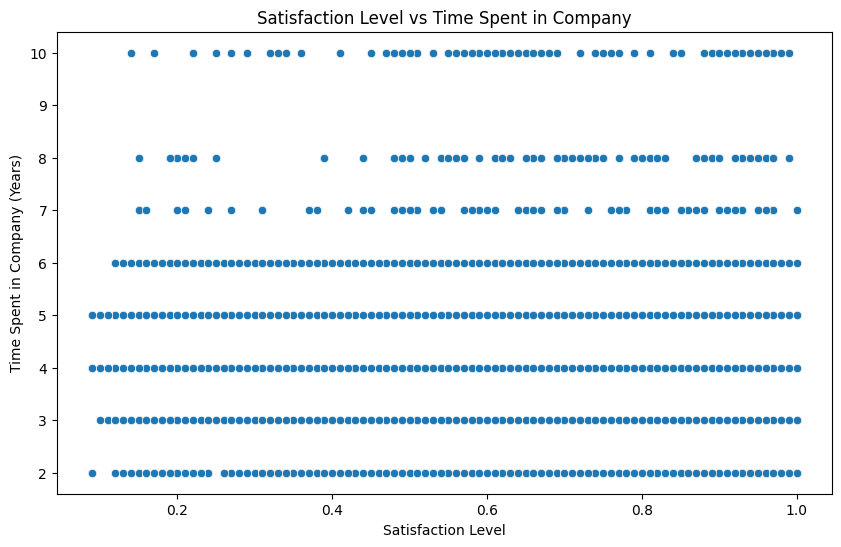

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi distribusi satisfaction_level dan time_spend_company
plt.figure(figsize=(14, 6))

# Distribusi satisfaction_level
plt.subplot(1, 2, 1)
sns.histplot(df['satisfaction_level'], bins=20, kde=True)
plt.title('Distribution of Satisfaction Level')
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')

# Distribusi time_spend_company
plt.subplot(1, 2, 2)
sns.histplot(df['time_spend_company'], bins=10, kde=True)
plt.title('Distribution of Time Spent in Company')
plt.xlabel('Time Spent in Company (Years)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Scatter plot untuk melihat hubungan antara satisfaction_level dan time_spend_company
plt.figure(figsize=(10, 6))
sns.scatterplot(x='satisfaction_level', y='time_spend_company', data=df)
plt.title('Satisfaction Level vs Time Spent in Company')
plt.xlabel('Satisfaction Level')
plt.ylabel('Time Spent in Company (Years)')
plt.show()


In [32]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Mengubah data menjadi format yang sesuai untuk regresi
X = df[['satisfaction_level']]
y = df['time_spend_company']

# Membuat model regresi linier
reg_model = LinearRegression()
reg_model.fit(X, y)

# Koefisien regresi
coef = reg_model.coef_
intercept = reg_model.intercept_

# R-squared value
r_squared = reg_model.score(X, y)

print(f"Koefisien: {coef}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_squared}")


Koefisien: [-0.5923574]
Intercept: 3.8612496898271567
R-squared: 0.010173964597303464
